In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split  
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from tensorflow.keras.initializers import he_normal
from tensorflow.keras import optimizers
from keras.regularizers import l2
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import load_model




Using TensorFlow backend.


In [ ]:
dataDir="data/data/"
category=["healthyfood","junkfood"]

def save(X,y,x_test,y_test):
    pickle_out = open("X.pickle","wb")
    pickle.dump(X, pickle_out)
    pickle_out.close()
    
    pickle_out = open("x_test.pickle","wb")
    pickle.dump(x_test, pickle_out)
    pickle_out.close()
    
    pickle_out = open("y.pickle","wb")
    pickle.dump(y, pickle_out)
    pickle_out.close()
    
    pickle_out = open("y_test.pickle","wb")
    pickle.dump(y_test, pickle_out)
    pickle_out.close()

def load():
    pickle_in = open("X.pickle","rb")
    X = pickle.load(pickle_in)
    
    pickle_in = open("x_test.pickle","rb")
    x_test = pickle.load(pickle_in)
    
    pickle_in = open("y.pickle","rb")
    y = pickle.load(pickle_in)
    
    pickle_in = open("y_test.pickle","rb")
    y_test = pickle.load(pickle_in)
    return X,x_test,y,y_test
def data_set():
    
    #IMG_SIZE=256
    data=[]
    
    for cat in category:
        path = os.path.join(dataDir,cat)
        class_num=category.index(cat)
        for img in os.listdir(path):
            
      
            try:
                
                img_array = cv2.imread(os.path.join(path,img) )  # convert to array
                new_array = cv2.resize(img_array, (255, 255))  # resize to normalize data size
                data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                    pass
                
    
    
    random.shuffle(data)
    
    X=[]
    y=[] 
    for features,label in data:
        X.append(features)
        y.append(label)         
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
    
    
    X_train = np.array(X_train).reshape(-1, 255, 255, 3)
    X_test = np.array(X_test).reshape(-1, 255, 255, 3)
    print(X_test.shape)
    
    X_train = X_train/255.0
    X_test=X_test/255.0
    
    save(X_train,y_train,X_test,y_test)
    
    
    



In [ ]:
data_set()

In [2]:
#data_set()
def load():
    pickle_in = open("X.pickle","rb")
    X = pickle.load(pickle_in)
    
    pickle_in = open("x_test.pickle","rb")
    x_test = pickle.load(pickle_in)
    
    pickle_in = open("y.pickle","rb")
    y = pickle.load(pickle_in)
    
    pickle_in = open("y_test.pickle","rb")
    y_test = pickle.load(pickle_in)
    return X,x_test,y,y_test
X_train,X_test,y_train,y_test=load()

In [ ]:
X_train.shape

In [3]:
model = Sequential()
model.add(Conv2D(32, (1, 1), input_shape=X_train.shape[1:]))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 1)))


model.add(Conv2D(64, (1, 2)))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Conv2D(64, (2, 1)))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (2, 2)))
#model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 2),kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 3)))
model.add(Conv2D(128, (2, 3),kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(3, 2)))
model.add(Conv2D(256, (3, 3),kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))






model.add(Flatten())


model.add(Dense(1024,kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
#model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(1024,kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(Dropout(0.1))
model.add(Activation('relu'))
model.add(Dense(512,kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(Dropout(0.2))
model.add(Activation('relu'))





model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False),metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#predout = np.argmax(predicts)
#testout = np.argmax(y_test)
#
#
#testScores = metrics.accuracy_score(y_test,predicts)
#confusion = metrics.confusion_matrix(testout,predout)
#print(result)
#print(confusion)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 32)      128       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 255, 255, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 255, 254, 64)      4160      
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 255, 254, 64)      256       
_________________________________________________________________
activation_1 (Activat

In [4]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")
bs=4
epoch=40
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
H = model.fit_generator(aug.flow(X_train, y_train, batch_size=bs),
	 steps_per_epoch=len(X_train),
	epochs=epoch)
model.save_weights('my_model_weights.h5')
bs=8
epoch=100
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.0001), metrics=['accuracy'])
model.load_weights('my_model_weights.h5')
H = model.fit_generator(aug.flow(X_train, y_train, batch_size=bs),
	 steps_per_epoch=len(X_train),
	epochs=epoch)
model.save_weights('my_model_weights.h5')
bs=16
epoch=60
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00001), metrics=['accuracy'])
model.load_weights('my_model_weights.h5')
H = model.fit_generator(aug.flow(X_train, y_train, batch_size=bs),
	 steps_per_epoch=len(X_train),
	epochs=epoch)




Instructions for updating:
Use tf.cast instead.
Epoch 1/40
452/452 [==============================] - 31s 68ms/step - loss: 0.7480 - acc: 0.7209
Epoch 2/40
452/452 [==============================] - 28s 61ms/step - loss: 0.6483 - acc: 0.7580
Epoch 3/40
452/452 [==============================] - 27s 60ms/step - loss: 0.5896 - acc: 0.7785
Epoch 4/40
452/452 [==============================] - 27s 60ms/step - loss: 0.5630 - acc: 0.7868
Epoch 5/40
452/452 [==============================] - 28s 63ms/step - loss: 0.5610 - acc: 0.7807
Epoch 6/40
452/452 [==============================] - 27s 60ms/step - loss: 0.5582 - acc: 0.7829
Epoch 7/40
452/452 [==============================] - 27s 60ms/step - loss: 0.5357 - acc: 0.7769
Epoch 8/40
452/452 [==============================] - 27s 60ms/step - loss: 0.5350 - acc: 0.7868
Epoch 9/40
452/452 [==============================] - 27s 60ms/step - loss: 0.5231 - acc: 0.7841
Epoch 10/40
452/452 [==============================] - 27s 60ms/step - loss: 0.

226/226 [==============================] - 24s 106ms/step - loss: 0.2757 - acc: 0.8931
Epoch 41/100
226/226 [==============================] - 24s 106ms/step - loss: 0.2728 - acc: 0.8893
Epoch 42/100
226/226 [==============================] - 24s 106ms/step - loss: 0.2611 - acc: 0.8981
Epoch 43/100
226/226 [==============================] - 24s 106ms/step - loss: 0.2665 - acc: 0.8870
Epoch 44/100
226/226 [==============================] - 24s 106ms/step - loss: 0.2577 - acc: 0.8970
Epoch 45/100
226/226 [==============================] - 24s 106ms/step - loss: 0.2706 - acc: 0.8992
Epoch 46/100
226/226 [==============================] - 24s 106ms/step - loss: 0.2718 - acc: 0.8942
Epoch 47/100
226/226 [==============================] - 24s 107ms/step - loss: 0.2502 - acc: 0.9075
Epoch 48/100
226/226 [==============================] - 24s 106ms/step - loss: 0.2620 - acc: 0.9025
Epoch 49/100
226/226 [==============================] - 24s 106ms/step - loss: 0.2511 - acc: 0.9092
Epoch 50/100


113/113 [==============================] - 23s 201ms/step - loss: 0.1788 - acc: 0.9336
Epoch 22/60
113/113 [==============================] - 23s 201ms/step - loss: 0.1715 - acc: 0.9413
Epoch 23/60
113/113 [==============================] - 23s 201ms/step - loss: 0.1785 - acc: 0.94241s - loss: 0.1817 - acc
Epoch 24/60
113/113 [==============================] - 23s 201ms/step - loss: 0.1700 - acc: 0.9385
Epoch 25/60
113/113 [==============================] - 23s 204ms/step - loss: 0.1761 - acc: 0.9363
Epoch 26/60
113/113 [==============================] - 23s 201ms/step - loss: 0.1780 - acc: 0.9341
Epoch 27/60
113/113 [==============================] - 23s 201ms/step - loss: 0.1691 - acc: 0.9435
Epoch 28/60
113/113 [==============================] - 23s 201ms/step - loss: 0.1693 - acc: 0.9419
Epoch 29/60
113/113 [==============================] - 23s 201ms/step - loss: 0.1722 - acc: 0.93962s - loss: 0.1712 -
Epoch 30/60
113/113 [==============================] - 23s 202ms/step - loss: 0

[0.3214428175603394, 0.88716817]


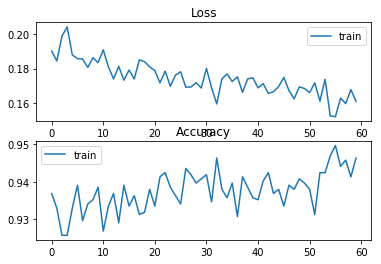

In [5]:
test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_acc)
plt.subplot(211)
plt.title('Loss')
plt.plot(H.history['loss'], label='train')
#plt.plot(H.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(H.history['acc'], label='train')
#plt.plot(H.history['val_acc'], label='test')
plt.legend()
plt.show()